# RSI Calculation

[RSI Trading Strategy and Backtest](https://www.youtube.com/watch?v=pB8eJwg7LJU)

[Preliminary video](https://www.youtube.com/watch?v=JvfK4VBX75I&t)

(macroption)[https://www.macroption.com/rsi-calculation/]

## RSI Formula

    RSI = 100 – 100 / ( 1 + RS )
    RS = Relative Strength = AvgU / AvgD
    AvgU = average of all up moves in the last N price bars
    AvgD = average of all down moves in the last N price bars
    N = the period of RSI
    There are 3 different commonly used methods for the exact calculation of AvgU and AvgD (see details below)


### Step 1

Upmoves:
- take daily return if return is positive
- Take 0 if daily return is negative or zero

Downmoves:
- absolute value of daily return if return is negative
- zero if return is positive or zero

### Step 2

Averaging Up and Downmoves
- Pick an average method
-- e.g. simplve moving average, exponential moving average

- Using Wilder's Smoothing Method (WSM), exponential moving average with a different smoothing factor
    \%alpha = 2 / (N + 1)
    \%alpha = 1 / N (in WSM)


### Step 3

RS and RSI calculation

- RS -> Average Upmove / Average Downmove
- RSI -> 100 - 100 / (1 + RS)


In [21]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [11]:
pd.options.mode.chained_assignment = None
tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0].Symbol.to_list()
# replace '.' in ticker symbol with '-'
tickers = [i.replace('.', '-') for i in tickers]
# pop 'VNT' - may need to change the number below
tickers.pop(474)
# pop 'WRK' - may need to change the number below
tickers.pop(489)

'WY'

In [14]:
def RSIcalc(asset):
    df = yf.download(asset, start='2011-01-01')
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['price change'] = df['Adj Close'].pct_change()
    df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df['avg Up'] / df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100 - (100 / (x + 1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    return df

In [27]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []
    for i in range(len(df) - 11):
        if "Yes" in df['Buy'].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1, 11):
                if df['RSI'].iloc[i + j] > 40:
                    Selling_dates.append(df.iloc[i + j + 1].name)
                    break
                elif j == 10:
                    Selling_dates.append(df.iloc[i + j + 1].name)
    return Buying_dates, Selling_dates

In [19]:
frame = RSIcalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


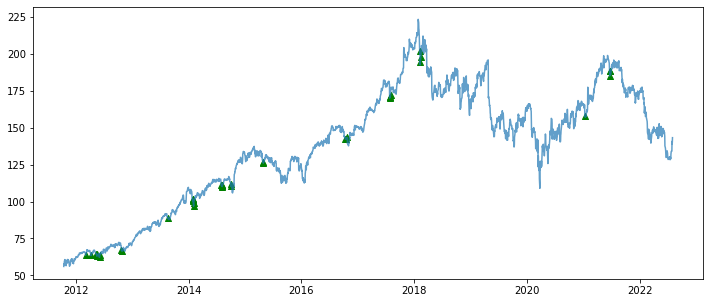

In [22]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker='^', c='g')
plt.plot(frame['Adj Close'], alpha=0.7)

In [23]:
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values) / frame.loc[buy].Open.values

In [28]:
matrixsignals = []
matrixprofits = []
for i in range(len(tickers)):
    frame = RSIcalc(tickers[i])
    buy, sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values) / frame.loc[buy].Open.values
    matrixsignals.append(buy)
    matrixprofits.append(Profits)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ValueError: cannot set a frame with no defined index and a scalar

In [29]:
matrixprofits

[array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
         0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
         0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
         0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
         0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
         0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
         0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
         0.00861573,  0.01892706, -0.0052846 ,  0.01409035,  0.01120925]),
 array([ 0.01139   ,  0.02685855,  0.03080768,  0.03023579,  0.01865058,
         0.01447318, -0.06519997, -0.03349874, -0.00586631, -0.01515151,
         0.00828728,  0.00700343,  0.03806611,  0.04262805,  0.02528094,
         0.0295075 ,  0.03721785,  0.03030303,  0.10867306, -0.08967923,
         0.00066135,  0.01181451,  0.00799468,  0.00487052,  0.01954175,
         0.02925172,  0.035592  ,  0.00256128,  0

In [31]:
allprofit = []
for i in matrixprofits:
    for e in i:
        allprofit.append(e)

[0.018418579706364967,
 0.013238018338075487,
 -0.011518300161961533,
 -0.011058136854156816,
 0.0021231458807208312,
 0.012875558731741366,
 0.03632401178135978,
 0.028478671982978803,
 0.010333574992244634,
 0.015580865509459993,
 0.010122361761294841,
 -0.0034609824138999794,
 0.0010817790030185125,
 -0.004073779818850855,
 0.023459785828550146,
 0.010528826163336873,
 0.027599421741614928,
 0.005565457104999853,
 0.005565457104999853,
 0.012864692352916469,
 0.006283395964641448,
 0.011701289219769826,
 0.018618650760615963,
 0.013062456337555556,
 0.013008501408338877,
 0.013202419879189003,
 -0.0007665381965443523,
 0.003553065203201138,
 -0.018418724518970305,
 0.013669271812818008,
 0.020337466426487982,
 0.011952832489283168,
 0.01595001220703125,
 0.008527108646859727,
 0.02154844541533546,
 0.00861572556046653,
 0.01892706151398465,
 -0.005284596182899224,
 0.014090350783795424,
 0.011209247430109006,
 0.011390001361125114,
 0.026858548374935554,
 0.030807678266960632,
 0.03

In [32]:
wins = [i for i in allprofit if i > 0]
len(wins) / len(allprofit)

0.7052631578947368

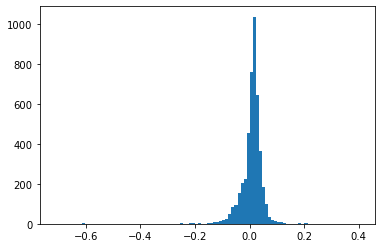

In [33]:
plt.hist(allprofit, bins=100)
plt.show()

In [34]:
for i in matrixsignals:
    for e in i:
        if e.year == 2021:
            print(e)
            

2021-01-12 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-09-15 00:00:00
2021-09-16 00:00:00
2021-09-17 00:00:00
2021-09-20 00:00:00
2021-09-28 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-09-03 00:00:00
2021-09-07 00:00:00
2021-09-08 00:00:00
2021-03-05 00:00:00
2021-03-09 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-10-04 00:00:00
2021-05-05 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-06-22 00:00:00
2021-06-23 00:00:00
2021-06-24 00:00:00
2021-06-28 00:00:00
2021-06-29 00:00:00
2021-06-30 00:00:00
2021-07-01 00:00:00
2021-07-02 00:00:00
2021-07-06 00:00:00
2021-07-07 00:00:00
2021-07-08 00:00:00
2021-07-09 00:00:00
2021-07-15 00:00:00
2021-07-19 00:00:00
2021-07-20 00:00:00
2021-07-23 00:00:00
2021-09-28 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-10-04 00:00:00
2021-10-05 00:00:00
2021-10-06 00:00:00
2021-10-07 00:00:00
2021-01-15 00:00:00
